In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

# Generic expansion of root

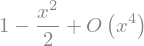

In [6]:
series(sqrt(1-x**2),x,0,4)

#  Approximations to full Hamiltonian

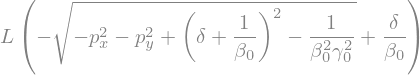

In [49]:
H0 = HamDrift6D(beta0, gamma0, L, x, px, y, py, delta)
H0

The following approximations is first applied:
$$\frac{1}{\beta_0^2\gamma_0^2} \rightarrow 0 \\
$$


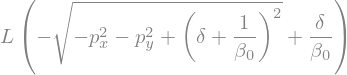

In [50]:
H1 = H0.subs(beta0*gamma0,oo)
H1

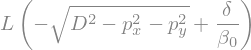

In [51]:
D = symbols("D")
H2 = H1.subs(delta+1/beta0,D)
H2

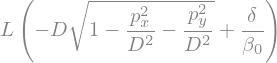

In [53]:
H3 = H2.subs(D**2-px**2-py**2,1-px**2/D**2-py**2/D**2)
srt = H3.as_terms()[1][1].as_terms()[1][2]
H4 = H3.subs(srt, D*srt)
H4

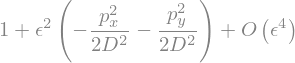

In [54]:
sub0 = list(zip([px,py],[eps*px,eps*py]))
temp =series(H4.as_terms()[1][1].as_terms()[1][3].subs(sub0),eps,0,4)
temp

In [55]:
temp = temp.removeO().subs(eps,1)

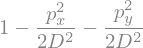

In [56]:
temp

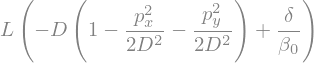

In [57]:
H5 = H4.subs(H4.as_terms()[1][1].as_terms()[1][3],temp)
H5

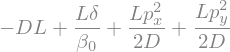

In [58]:
simplify(H5)

With
$$D = \sqrt{\delta^{2} + \frac{2 \delta}{\beta_{0}} + \frac{1}{\beta_{0}^{2}}}$$

These are Eq 3.2 and 3.3 in Wolski where for some reason his $\frac{1}{\beta_{0}^{2}}=1$.